In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import csv

In [2]:
def loadData(path):
    with open(path, 'r') as f:
        A = csv.reader(f)
        temp = list(A)
    # print(temp[0])
    feature_labels = temp[0]
    np_all = np.array(temp[1:])
    N,p = np_all.shape[0], np_all.shape[0]-1
    return temp, np_all, feature_labels

In [3]:
def processData(np_all):
    np.random.shuffle(np_all)
    X_all = np_all[:,3:].astype(float)
    Y_all = np_all[:,1].astype(float).astype(int)
    return X_all, Y_all

In [4]:
def predict_model(X_train, Y_train , X_test, Y_test):
    eval_set = [(X_test, Y_test)]
    clf = XGBClassifier(n_estimators = 300, learning_rate = 0.03, max_depth=5, subsample = 0.5)
    clf.fit(X_train, Y_train, early_stopping_rounds=20, eval_metric="logloss", eval_set=eval_set, verbose=False)
    Y_pred = clf.predict(X_test)
    Y_pred_prob = clf.predict_proba(X_test)[:,1]
    return Y_pred, Y_pred_prob

In [5]:
def get_TNR(x, Y_test, Y_pred_prob):
    num = 100
    Thr = np.linspace(0.01,0.99,num = num)
    NPV_vec= np.zeros(num)
    TNR_vec = np.zeros(num)
    y = 0

    for i in range(num):
        Y_pred_2 = (Y_pred_prob >= Thr[i] ).astype(bool)
        tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_2).ravel()
        NPV_vec[i] = tn/(fn+tn)
        TNR_vec[i] = tn/(tn+fp)
        if  NPV_vec[i] >= x and TNR_vec[i]>=y:
            y= TNR_vec[i]
    return y

In [6]:
def get_TNR_vec(x,N, np_train, np_test):
    
    TNR = np.zeros(N)
    
    for i in range(N):
        X_train, Y_train = processData(np_train)
        X_test, Y_test = processData(np_test)

        Y_pred, Y_pred_prob = predict_model(X_train, Y_train , X_test, Y_test)

        TNR[i]= get_TNR(x, Y_test, Y_pred_prob)

    A = TNR[np.nonzero(TNR)[0]]
    return np.mean(A)

In [7]:
temp, np_train, feature_labels = loadData('/Users/g0123/Documents/Heme-STAMP/blood_leuk_mds_train3.csv')
temp, np_test, feature_labels = loadData('/Users/g0123/Documents/Heme-STAMP/blood_leuk_mds_test3.csv')

#Shuffle Data
X_train, Y_train = processData(np_train)
X_test, Y_test = processData(np_test)
        
Y_pred, Y_pred_prob = predict_model(X_train, Y_train , X_test, Y_test)
accuracy = accuracy_score(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_pred_prob)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: %.2f%%" % (auc * 100.0))

Accuracy: 70.16%
AUC: 77.20%


/Users/g0123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'NPV')

Text(0, 0.5, 'TNR')

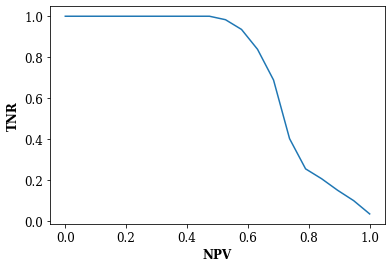

In [12]:
NPV= np.linspace(0.0,1.0, 20)
TNR = np.zeros(20)
for i in range(NPV.shape[0]):
    TNR[i] = get_TNR_vec(NPV[i],50, np_train, np_test)
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'

plt.plot(NPV,TNR)
plt.xlabel('NPV')
plt.ylabel('TNR')
plt.show()

In [13]:
NPV
TNR

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98310811, 0.93554054, 0.83837838, 0.68810811, 0.40148649,
       0.25378378, 0.20554054, 0.14905405, 0.0984556 , 0.03347666])

In [14]:
get_TNR_vec(0.98,50, np_train, np_test)

/Users/g0123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


0.04499385749385749